In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, mpld3
from ThermoPyle import *
from sklearn import svm
from sklearn.linear_model import SGDRegressor
%matplotlib notebook
mpld3.enable_notebook()
plt.style.use(["seaborn-talk", "seaborn-notebook", "seaborn-paper"])

In [2]:
waterD = CSVFluid("../finalData/Water_T-217_P-217_U_with_derivatives_and_volume")
Water = ThermoFluid()
Water.data = waterD.data
Water.vars = list(set(Water.vars).union(list(Water.data.columns)))
Water.make_units()
Water.make_meta()
Water.refresh()

In [3]:
X = np.array(Water.data[["T","P","D","S"]])
y = np.array(Water.data["U"])
clf = svm.SVR()
clf.fit(X,y)

In [31]:
clf.predict(np.array([[300.10, 5.0*10**6, 2500, 1e+03]]))

array([ 3016616.51028331])

In [34]:
clf2 = SGDRegressor(loss="huber", n_iter=100)
clf2.fit(X,y)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='huber', n_iter=100, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

In [35]:
clf2.predict(np.array([[300.10, 5.0*10**6, 2500, 1e+03]]))

array([ -5.34076608e+10])

In [3]:
dir(Water)

['M',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'add_column',
 'clean',
 'colorMap',
 'copy',
 'data',
 'fluid',
 'make_meta',
 'make_units',
 'meta',
 'numPoints',
 'refresh',
 'units',
 'vars',
 'write_data',
 'xvar',
 'yvar',
 'zvar']

<IPython.core.display.Javascript object>


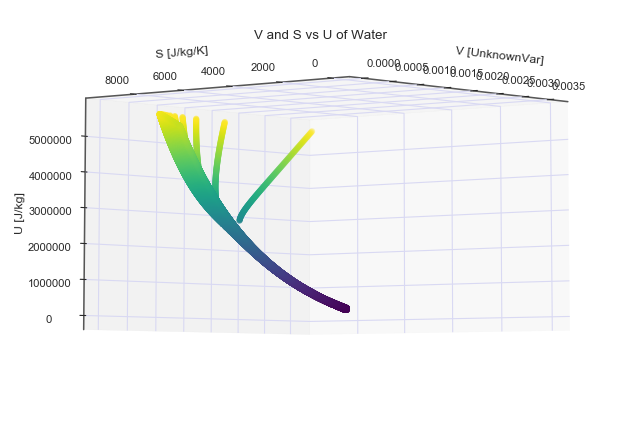

Text(0.5,0.92,'V and S vs U of Water')

In [8]:
water = Water
fig = plt.figure(100)
ax = fig.add_subplot(111, projection="3d")
ax.scatter(water.data["V"],
           water.data["S"], 
           water.data["U"], 
           c=water.data["U"], 
           cmap=water.colorMap,
          edgecolors='none')
ax.set_xlabel("{0} [{1}]".format("V", water.units["V"]))
ax.set_ylabel("{0} [{1}]".format("S", water.units["S"]))
ax.set_zlabel("{0} [{1}]".format("U", water.units["U"]))
ax.set_title("{0} and {1} vs {2} of {3}".format("V", "S", "U", water.fluid))
plt.sh